In [2]:
import pandas as pd
import numpy as np

# import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sur = pd.read_csv('kaggle_survey_2022_responses.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_15292\4079606519.py:1: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  sur = pd.read_csv('kaggle_survey_2022_responses.csv')


In [4]:
survey = sur.copy()

In [5]:
survey = survey.iloc[1:, ]

In [6]:
survey.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [7]:
survey.tail()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
23993,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
23994,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23995,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23996,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23997,303,18-21,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other


In [8]:
survey.columns

Index(['Duration (in seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5',
       ...
       'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
       'Q44_11', 'Q44_12'],
      dtype='object', length=296)

## Function to track total count for multichoice answers.

In [33]:
def t(survey,question,col,sort=True):
    
    col_list = [x for x in list(survey.columns) if question in x]

    d = pd.DataFrame(survey[col_list].count()).reset_index()
    d.columns = [col,"People"]
    d[col] = [survey[k].unique()[1] for k in col_list]
    
    d = d.sort_values(["People"],ascending=False)
    
    return d

# simple visualization

###  What is time period taken to answer the questions?

In [10]:
x = pd.to_numeric(survey['Duration (in seconds)'])
print(x)
max(x)
min(x)

1        121
2        462
3        293
4        851
5        232
        ... 
23993    331
23994    330
23995    860
23996    597
23997    303
Name: Duration (in seconds), Length: 23997, dtype: int64


120

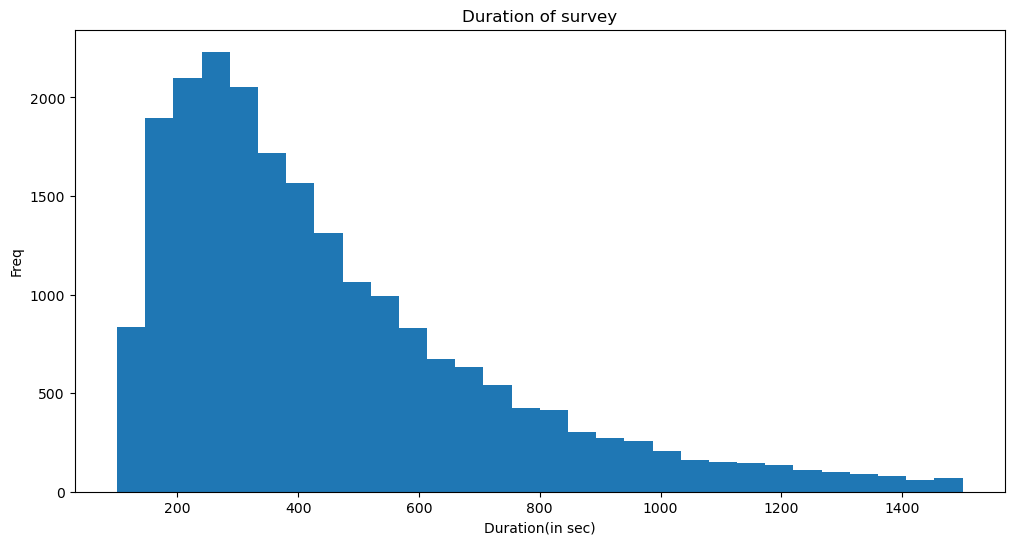

In [11]:
plt.figure(figsize=(12,6))
plt.hist(x, range = (100, 1500), bins = 30)
plt.xlabel("Duration(in sec)")
plt.ylabel("Freq")
plt.title("Duration of survey")
plt.show()

### what is the maximum age group?

Text(0.5, 1.0, 'age group')

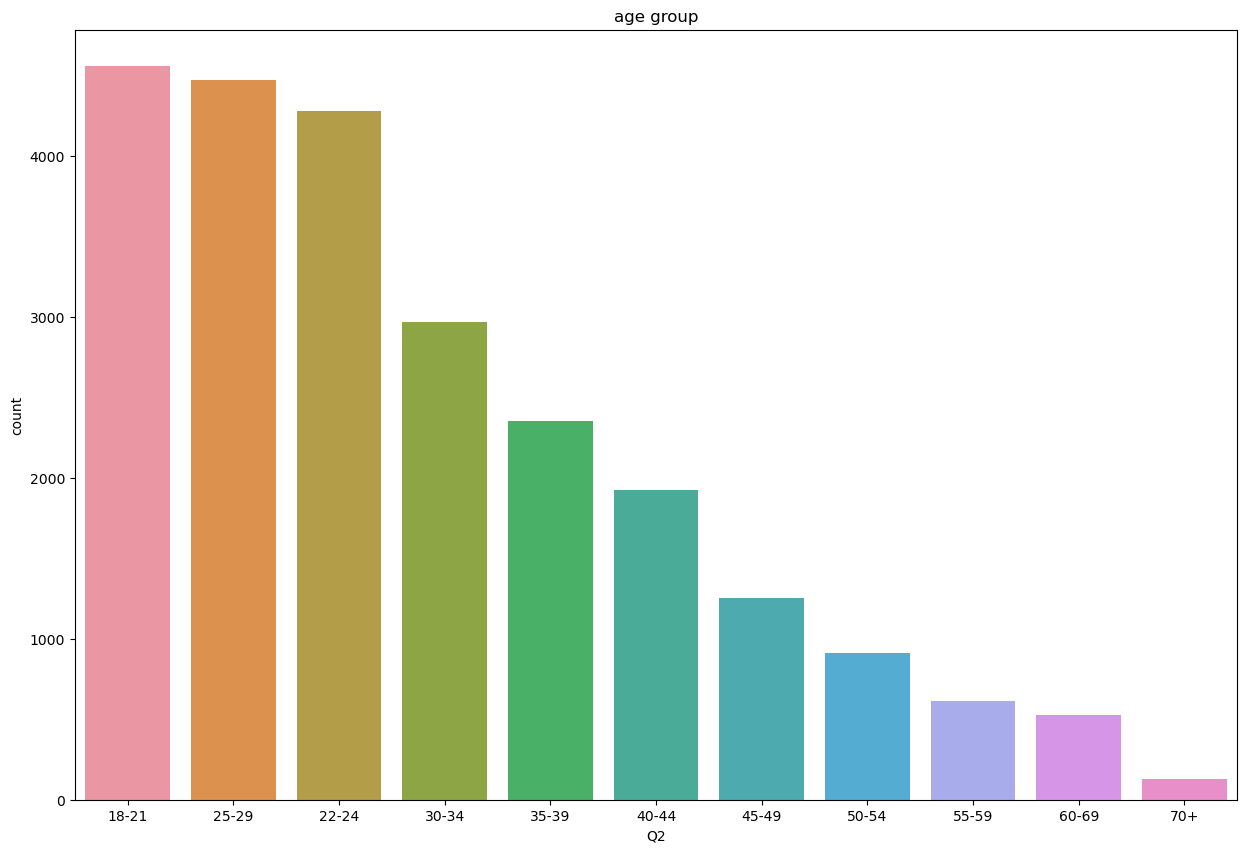

In [12]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'Q2', data = survey, order = survey.Q2.value_counts().index).set_title('age group')

<div class="alert alert-block alert-info">
<font color="red"> The count of people is maximum between age 18 to 29 and count starts decreasing as the age increases. </font>
</div>

### gender distribution

Text(0.5, 1.0, 'Gender Distribution')

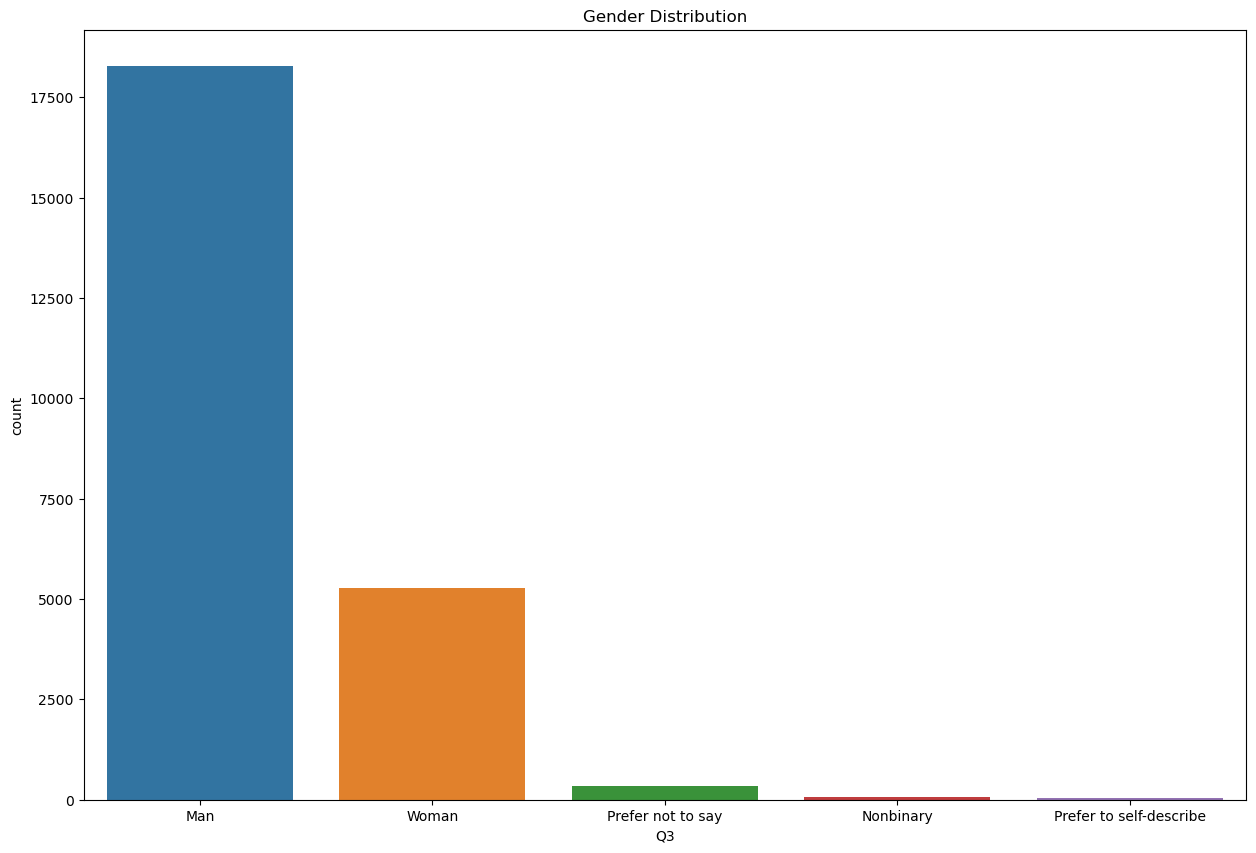

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='Q3', data = survey).set_title('Gender Distribution')

<div class="alert alert-block alert-info">
<font color="red"> Data consist of large number of males(18000) compare to female(5000) and  the other gender distribution is minimal   </font>
</div>

## which country we belong to?

D:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Q4', ylabel='count'>

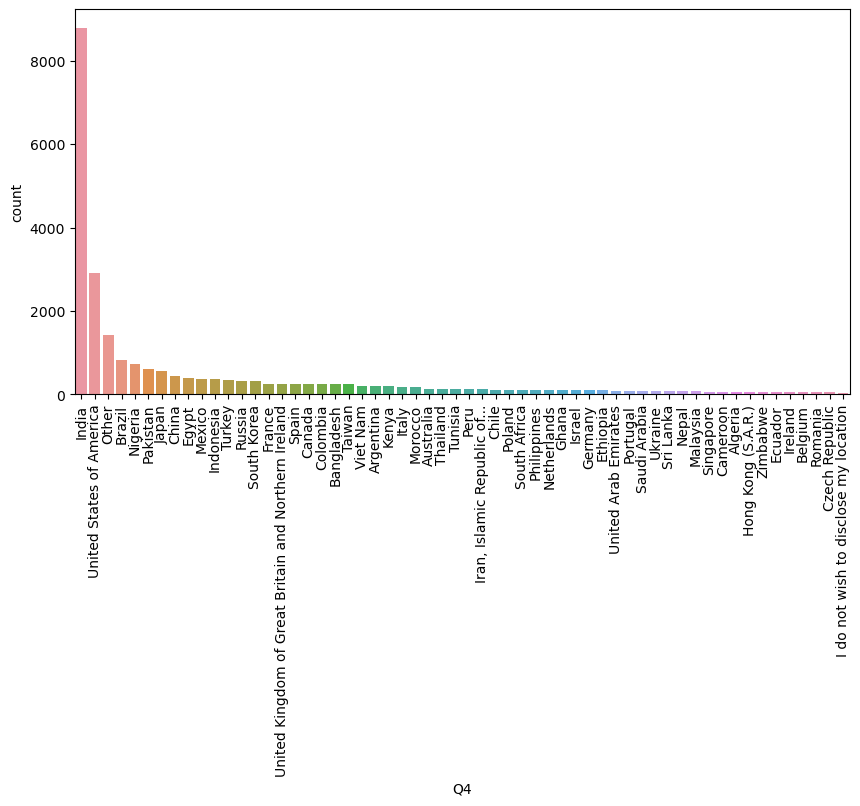

In [14]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.countplot(survey['Q4'], order = survey.Q4.value_counts().index)

<div class= "alert alert-block alert-info">
<font color = "red"> The number of people that is around 7000 are from India and around 3000 are from USA, rest are from other countries which is less than 2000.</font>
</div>

### Student or not Student

Text(0.5, 1.0, 'Student or not Student')

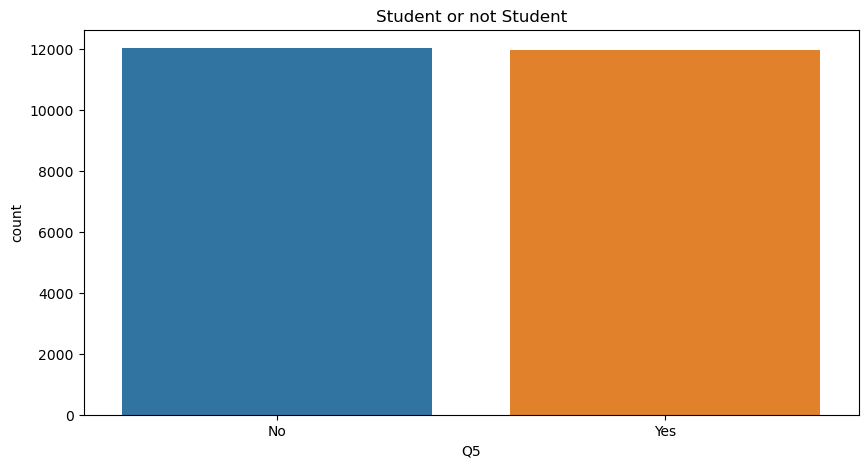

In [15]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Q5', data = survey).set_title('Student or not Student')

In [16]:
survey.Q5.value_counts()

No     12036
Yes    11961
Name: Q5, dtype: int64

<div class = "alert alert-block alert-info">
    <font color = "red"> The count of student and nonstudent is 50% which is around 12000 each.</font>
</div>

### platform we begun or completed data science courses

In [44]:
plat = t(survey,'Q6_', 'platform')

,platform,People
0,Coursera,9699
9,University Courses (resulting in a university ...,6780
2,Kaggle Learn Courses,6628
6,Udemy,6116
11,NaN,5669
3,DataCamp,3718
7,LinkedIn Learning,2766
10,None,2643
1,edX,2474
5,Udacity,2199


<AxesSubplot:xlabel='platform', ylabel='People'>

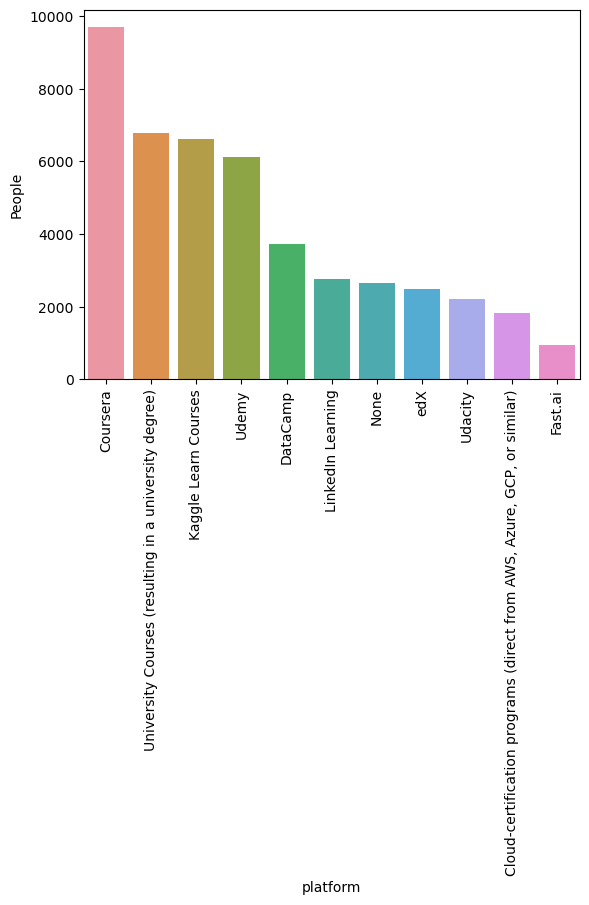

In [48]:
plt.xticks(rotation = 90)
sns.barplot(x='platform', y='People', data=plat)

<div class = "alert alert-block alert-info">
    <font color = "red"> Coursera rank's first to be choose as platform for gaining data science course.Lot of people(6500) also opted for university courses (also resulting in degree).</font>
</div>

### What products or platforms did you find to be most helpful when you first started studying data science?

In [54]:
product = t(survey,'Q7_', 'product')

<AxesSubplot:xlabel='product', ylabel='People'>

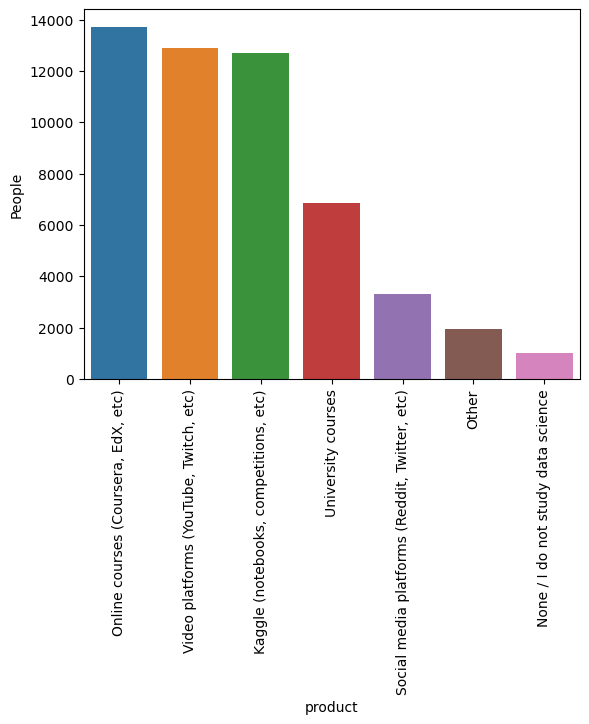

In [56]:
plt.xticks(rotation = 90)
sns.barplot(x='product', y='People', data=product)

<div class = 'alert alert-block alert-info'>
    <font color="red"> Online courses like Coursera,EdX, ect. , Video platforms like Youtube, Twitch,ect. and Kaggle notebook, competions, ect. are top three products people found most helpful when you first started studying data science.</font>
</div>

## Highest level of formal education

In [17]:
S = survey.groupby('Q8').size()


([<matplotlib.patches.Wedge at 0x1b083ce0a30>,
 [Text(0.624159009222233, 1.0249026935308154, 'Bachelor’s degree'),
  Text(-0.8143422682564379, 0.7394908181518958, 'Doctoral degree'),
  Text(-1.0795036436849978, 0.21135724087623226, 'I prefer not to answer'),
  Text(-0.4109120316479137, -1.1274534590159293, 'Master’s degree'),
  Text(0.8971199740089049, -0.6365341720868266, 'No formal education past high school'),
  Text(0.984276519582774, -0.49112089448324364, 'Professional doctorate'),
  Text(1.0797582533191734, -0.21005264670821894, 'Some college/university study without earning a bachelor’s degree')],
 [Text(0.3640927553796359, 0.5978599045596423, '32.6%'),
  Text(-0.44418669177623876, 0.40335862808285217, '11.4%'),
  Text(-0.588820169282726, 0.11528576775067212, '6.0%'),
  Text(-0.23969868512794965, -0.6576811844259588, '39.1%'),
  Text(0.4893381676412208, -0.3472004575019054, '2.4%'),
  Text(0.5368781015906039, -0.26788412426358743, '2.5%'),
  Text(0.5889590472650036, -0.114574170

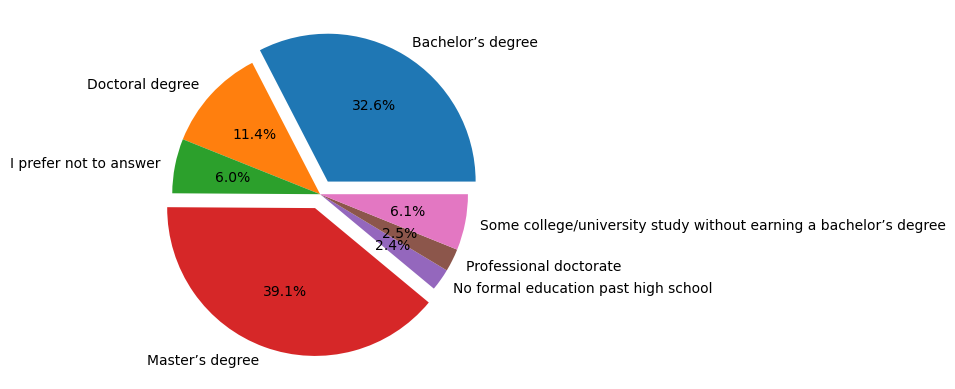

In [19]:
plt.pie(S, labels=S.index, explode = (0.1,0,0,0.1,0,0,0), autopct = '%2.1f%%')

<div class = "alert alert-block alert-info">
    <font color="red"> The people pursuing master's and bachelor's degree are more which is understable that they will opted for data science courses more than any other degree. </font>
</div>

### Did your research made use of machine learning.

In [58]:
r = t(survey,'Q10_', 'research')
r

,research,People
1,"Yes, the research made use of machine learning...",2463
2,No,1913
0,"Yes, the research made advances related to som...",1549


([<matplotlib.patches.Wedge at 0x1b092ca16d0>,
 [Text(0.28793902680324696, 1.0616454760623244, 'Yes, the research made use of machine learning as a tool (applied research)'),
  Text(-0.973333575248746, -0.5124663416201048, 'No'),
  Text(0.7493802687520386, -0.8052510247153509, 'Yes, the research made advances related to some novel machine learning method (theoretical research)')],
 [Text(0.15705765098358923, 0.5790793505794496, '41.6%'),
  Text(-0.5309092228629523, -0.27952709542914805, '32.3%'),
  Text(0.40875287386474823, -0.4392278316629186, '26.1%')])

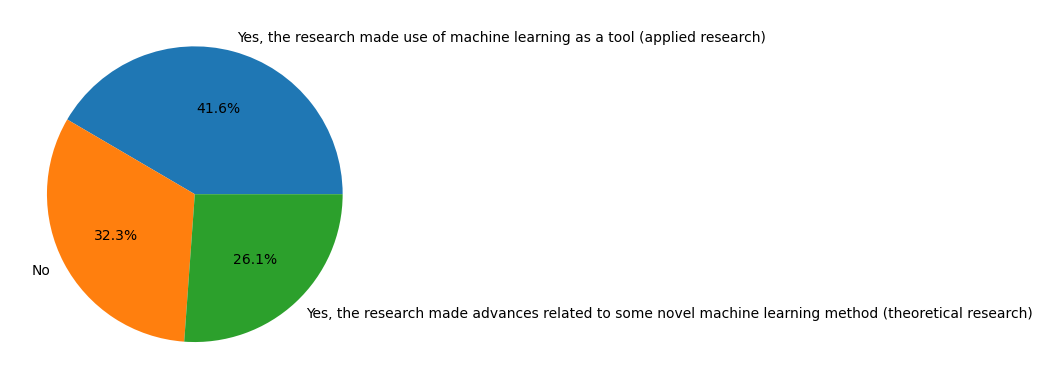

In [60]:
plt.pie(r.People, labels=r.research,  autopct = '%2.1f%%')

<div class = "alert alert-block alert-info">
    <font color = "red">Applied research as maximum persentage of 41.6% and therotical research as 26.1%. also 32.3% of the people have not made used of machine learning.</font>
</div>

#### what is the year of exprience of writing code?

Text(0, 0.5, 'no. of individuals')

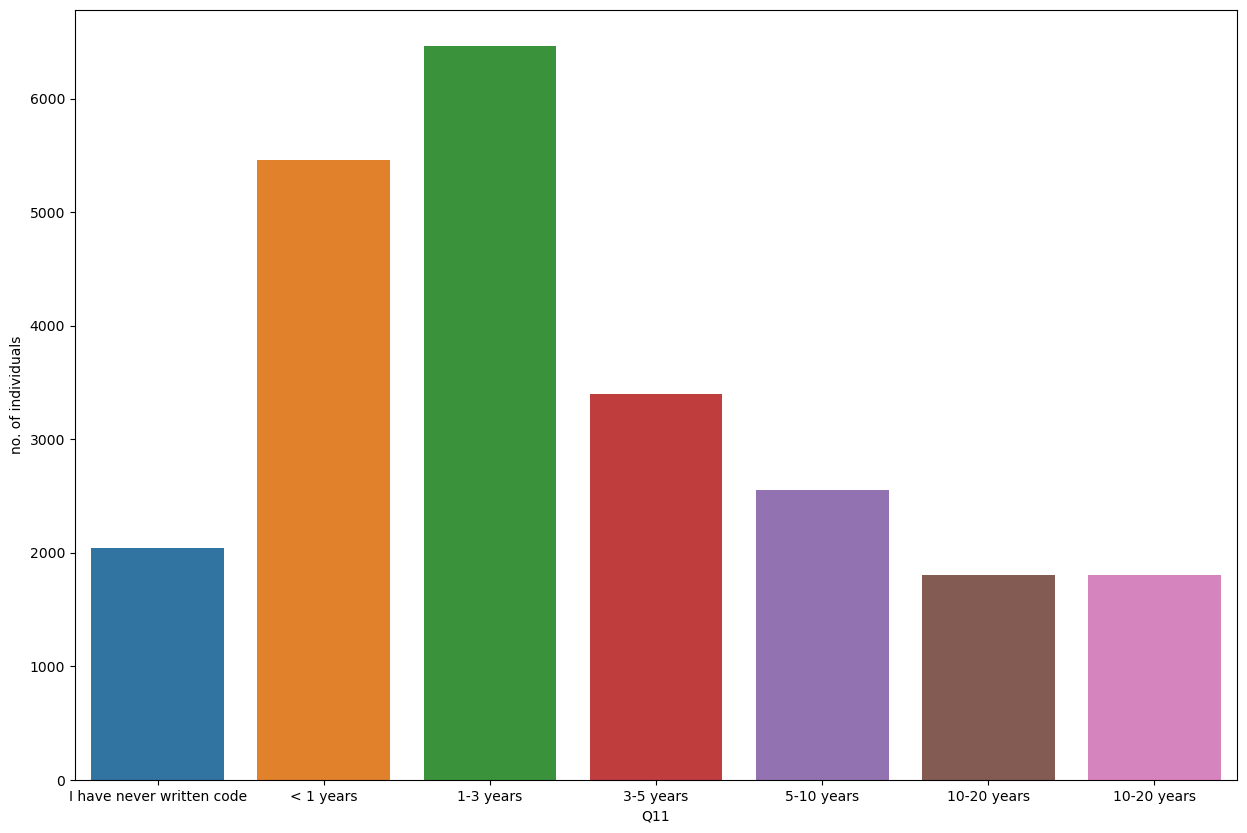

In [20]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'Q11', data = survey, order = ['I have never written code','< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','10-20 years'])
plt.ylabel("no. of individuals")

<div class = "alert alert-block alert-info">
    <font color = "red">The less than 1 year of experience are almost 5500 people and between 1-3 years are aprox 7000 people all others having expirence more than 3 years are below 4000</font>
</div>

### what programming language do you use on regular basis.

In [61]:
lang = t(survey,'Q12_', 'language')

Text(0.5, 1.0, 'Programming Language')

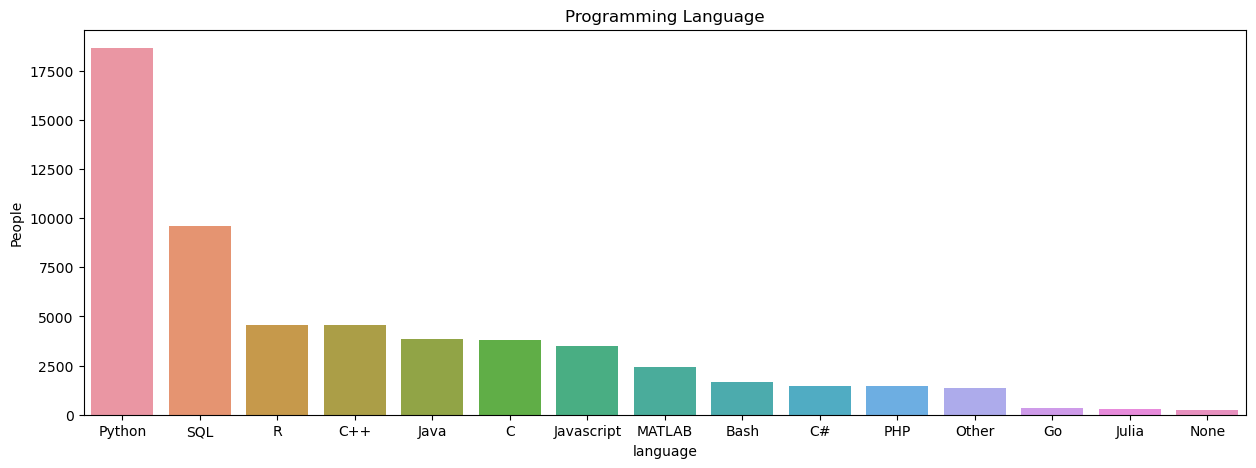

In [66]:
plt.figure(figsize = (15,5))
sns.barplot(x='language', y='People', data=lang)
plt.title('Programming Language')

<div class = "alert alert-block alert-info">
    <font color = "red">Among all the languages, phyton is the most used language.</font>
</div>

### IDE's used on regular basis.

In [80]:
I = t(survey,'Q13_', 'IDE')

Text(0.5, 1.0, "IDE's")

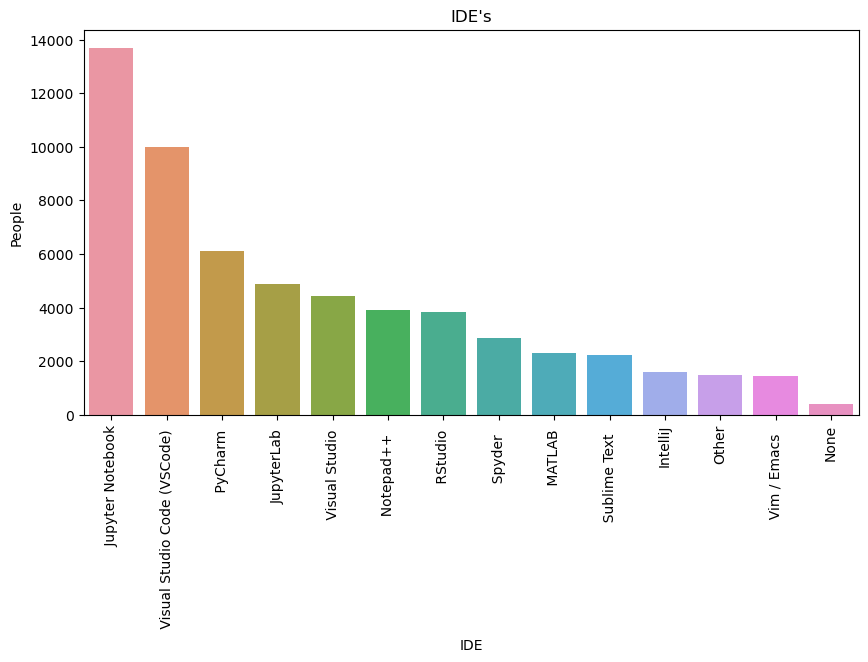

In [85]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.barplot(x='IDE', y='People', data=I)
plt.title('IDE\'s')

<div class = "alert alert-block alert-info">
    <font color = "red"> In IDE's jupyter notebook rank the first and visual studio code rank's second.</font>
<div>

### Use of hosted notebook products.

In [86]:
h = t(survey,'Q14_', 'notebook')

Text(0.5, 1.0, 'hosted notebook')

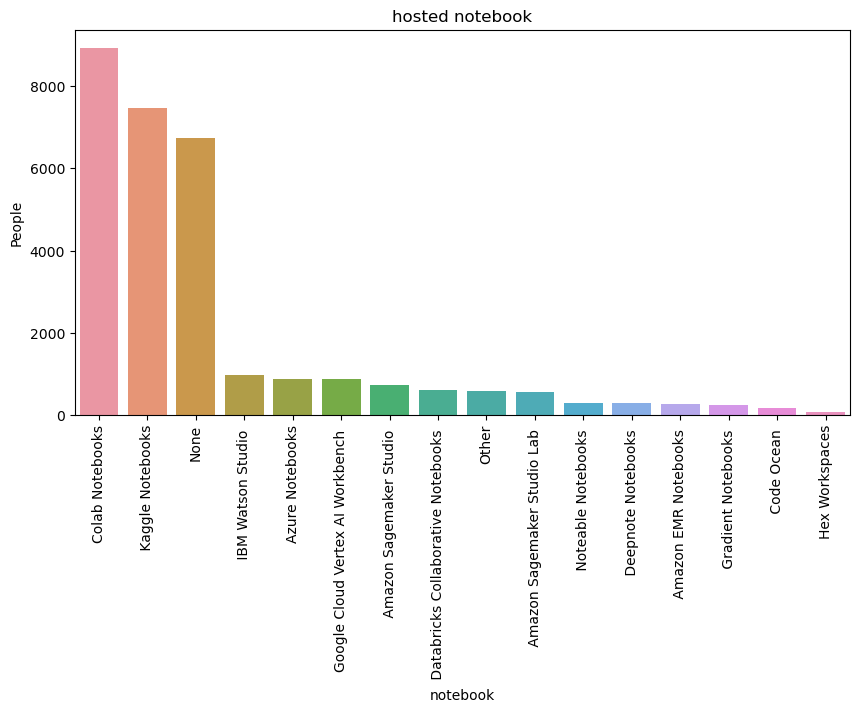

In [92]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.barplot(x='notebook', y='People', data=h)
plt.title('hosted notebook')

<div class = "alert alert-block alert-info">
    <font color = "red"> Colab Notebooks and Kaggle Notebooks are the two hosted notebooks which are most used by the people.Also there are lots of people who don't use this hosted products.</font>
</div>

#### years of using machine learing method?

Text(0, 0.5, 'no. of individuals')

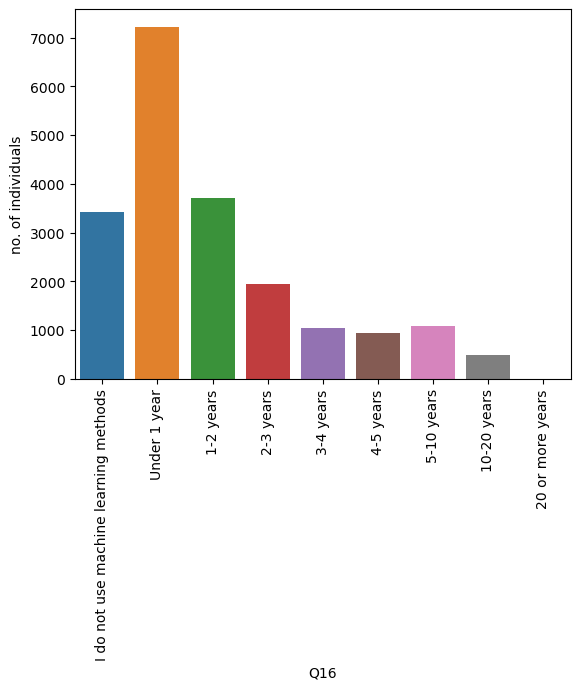

In [22]:
plt.xticks(rotation = 90)
sns.countplot(x = 'Q16', data = survey, order = ['I do not use machine learning methods','Under 1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-10 years','10-20 years','20 or more years'])
plt.ylabel("no. of individuals")

<div class ="alert alert-block alert-info">
    <font color = "red">more than 7000 people have experience of less than 1 year and there is no one who have expirence 20 or more than 20 years.</font>
</div>

#### ML Model hubs/repository we use most often

([<matplotlib.patches.Wedge at 0x1b09475ffa0>,
 [Text(0.8555373787882359, 0.6914157891574033, '  TensorFlow Hub '),
  Text(-0.23538015082551683, 1.0745213746582043, ' Huggingface Models '),
  Text(-0.6771292970339922, 0.866888640540555, ' Jumpstart '),
  Text(-0.9710079677446973, -0.5168592908870973, ' Kaggle datasets '),
  Text(0.3807616261560709, -1.031998344982677, ' NVIDIA NGC models  '),
  Text(0.47973961578856184, -0.9898736793364309, ' ONNX models '),
  Text(0.8197719461957179, -0.733467079172941, ' PyTorch Hub '),
  Text(1.0597451179005035, -0.2948563804397797, ' Timm '),
  Text(1.0963338894551478, -0.08973295287768208, 'Other storage services (i.e. google drive)')],
 [Text(0.4666567520663104, 0.37713588499494727, '21.6%'),
  Text(-0.1283891731775546, 0.5861025679953841, '13.6%'),
  Text(-0.3693432529276321, 0.47284834938575726, '0.6%'),
  Text(-0.5296407096789257, -0.2819232495747803, '43.8%'),
  Text(0.20768815972149318, -0.5629081881723693, '1.9%'),
  Text(0.2616761540664882

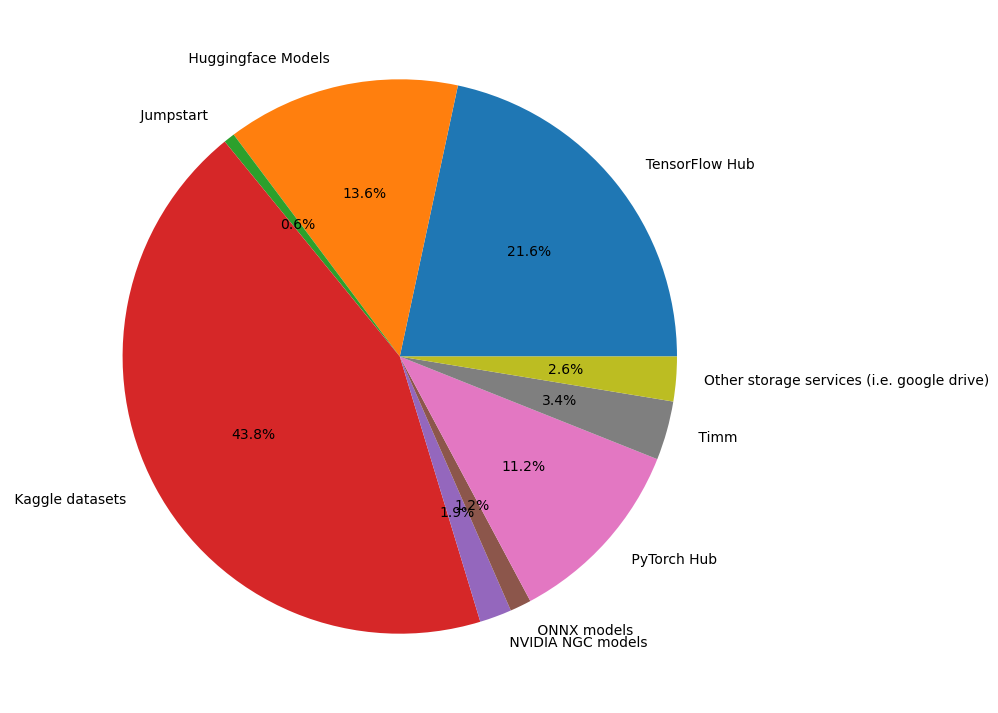

In [78]:
plt.figure(figsize=(13,9))
plt.pie(x = survey.groupby(['Q22']).size(), labels = survey.groupby(['Q22']).size().index, autopct='%2.1f%%')

<div class = "alert alert-block alert-info">
    <font color = "red">The Kaggle dataset is used the most which is 43.8% and least used is jumpstart which is 0.6%.</font>
</div>

#### what is your current role in industry

Text(0, 0.5, 'no. of individuals')

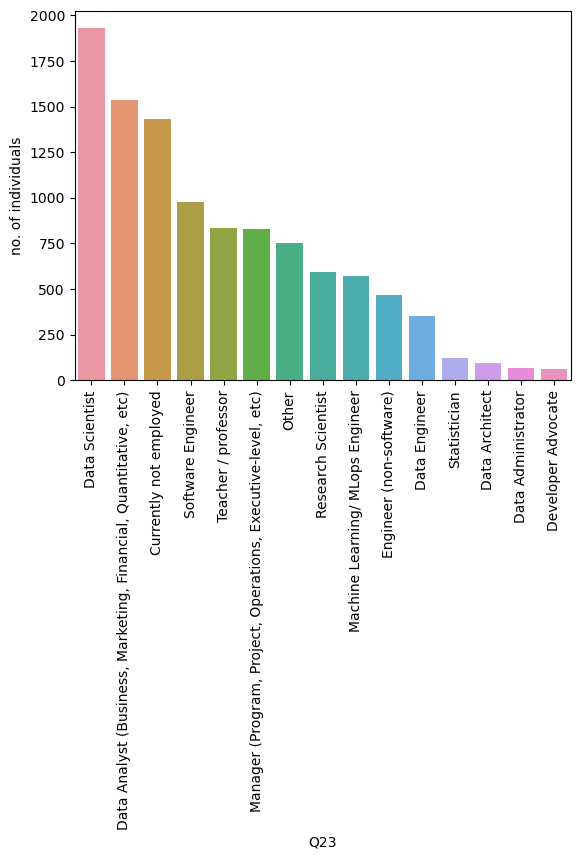

In [21]:
plt.xticks(rotation = 90)
sns.countplot(x = 'Q23', data = survey, order =survey.Q23.value_counts().index)
plt.ylabel("no. of individuals")

<div class = "alert alert-block alert-info">
    <font color = "red">The maximum number of people are from data scientist and data analyst background, a lot of people are unemployed(Maybe they are still students).</font>
</div>

#### Industry were people are working or already retired.

Text(0, 0.5, 'no. of individuals')

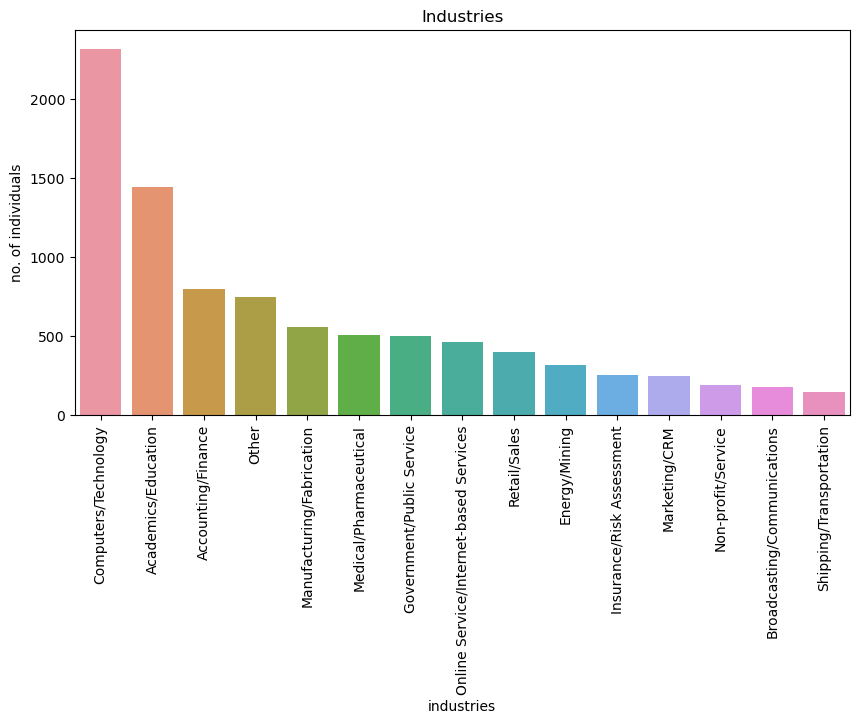

In [24]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.countplot(x = 'Q24', data = survey, order = survey.Q24.value_counts().index).set_title('Industries')
plt.xlabel("industries")
plt.ylabel("no. of individuals")

<div class = "alert alert-block alert-info">
    <font color = "red">The Computers/Tecnology and Academics/Education sector is rank's highest among all the other sectors.</font>
</div>

#### Size of the company.

Text(0, 0.5, 'no. of companies')

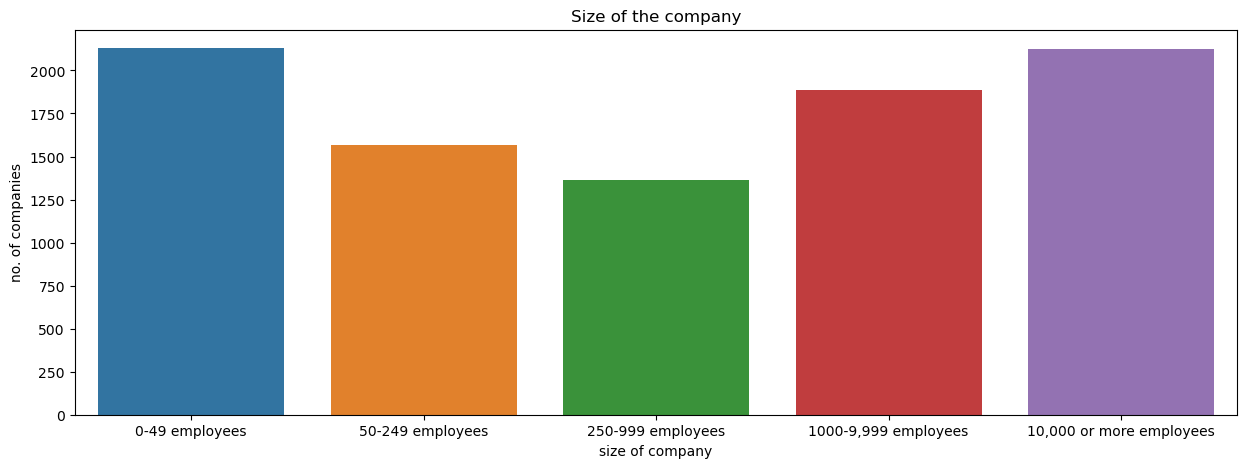

In [25]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Q25', data = survey, order = ['0-49 employees','50-249 employees','250-999 employees','1000-9,999 employees','10,000 or more employees']).set_title('Size of the company')
plt.xlabel('size of company')
plt.ylabel('no. of companies')

<div class = "alert alert-block alert-info">
    <font color = "red"> Ther are more than 2000 companies were employment is between 0-49 and also other 2000 companies were employment is above 10,000.</font>
</div>

#### Number of individuals responsible for data  science workload at place of bussiness.

In [26]:
N = survey.groupby(['Q26']).size() 

([<matplotlib.patches.Wedge at 0x1b083b04430>,
 [Text(0.960472556689479, 0.5361832409227052, '0'),
  Text(-0.08984926654049402, 1.0963243631800468, '1-2'),
  Text(-0.8910470454393409, 0.6450078781021371, '10-14'),
  Text(-1.0486284755365587, 0.3322323287909728, '15-19'),
  Text(-0.9213144790207469, -0.6009822216561234, '20+'),
  Text(0.3112801857167365, -1.0550377462347753, '3-4'),
  Text(1.0137114621408536, -0.4270703355704453, '5-9')],
 [Text(0.5238941218306249, 0.29246358595783917, '16.2%'),
  Text(-0.04900869084026946, 0.5979951071891164, '20.2%'),
  Text(-0.48602566114873136, 0.35182247896480207, '7.3%'),
  Text(-0.5719791684744865, 0.18121763388598514, '2.9%'),
  Text(-0.5025351703749529, -0.3278084845397036, '25.3%'),
  Text(0.169789192209129, -0.5754751343098774, '15.5%'),
  Text(0.552933524804102, -0.23294745576569742, '12.7%')])

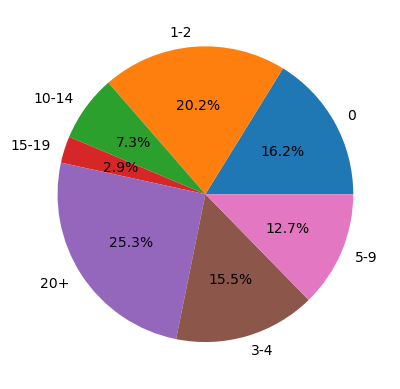

In [27]:
plt.pie(N, labels=N.index, autopct= '%2.1f%%')

<div class = "alert alert-block alert-info">
    <font color = "red"> 25.3% of companies have more than 20 employees responsible for data science workload and 20.2% of the companies have on 1-2 employees.(for more clear understanding we have to compare this with company size).</font>
</div>

#### How establish is industry in incorporating machine learning methods into the bussiness.

([<matplotlib.patches.Wedge at 0x1b083b73340>,
 [Text(0.9604489863460015, 0.5362254606291449, 'I do not know'),
  Text(-0.15913951780692587, 1.0884275877945118, 'No (we do not use ML methods)'),
  Text(-1.0825286021621083, 0.19527371943237026, 'We are exploring ML methods (and may one day put a model into production)'),
  Text(-0.5936917347412847, -0.9260292242148107, 'We have well established ML methods (i.e., models in production for more than 2 years)'),
  Text(0.5153560879146972, -0.9718066179283094, 'We recently started using ML methods (i.e., models in production for less than 2 years)'),
  Text(1.0415187615881911, -0.35389075893529715, 'We use ML methods for generating insights (but do not put working models into production)')],
 [Text(0.5238812652796371, 0.29248661488862443, '16.2%'),
  Text(-0.08680337334923229, 0.5936877751606426, '22.2%'),
  Text(-0.5904701466338772, 0.10651293787220195, '17.5%'),
  Text(-0.323831855313428, -0.5051068495717148, '20.0%'),
  Text(0.28110332068

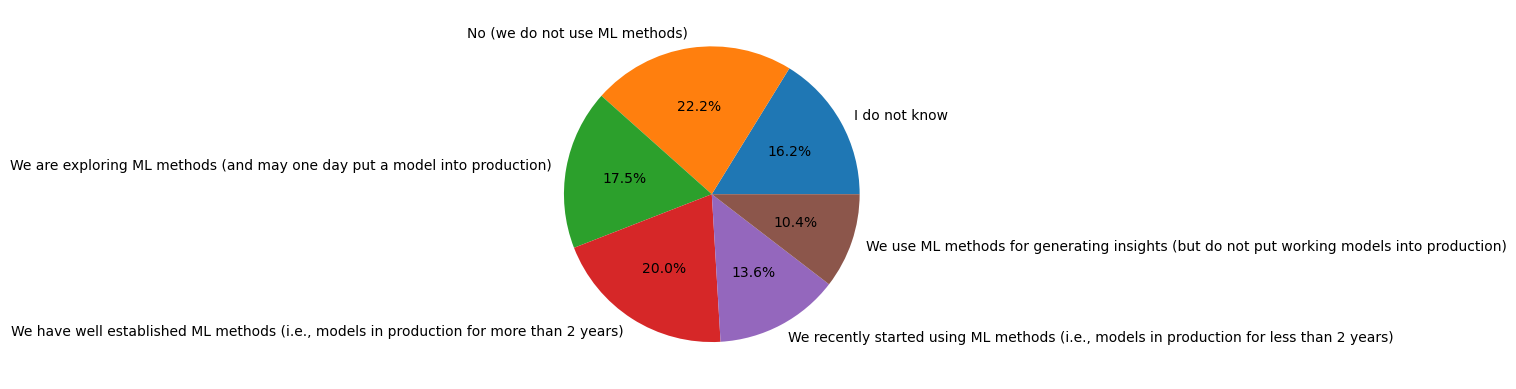

In [28]:
plt.pie(x= survey.groupby(['Q27']).size(), labels = survey.groupby(['Q27']).size().index, autopct='%2.1f%%')

<div class = "alert alert-block alert-info">
<font color = "red">some companies(20%) are well estabished, some(17.5%) are exploring and other have recently started using ML methods. A lot of companies donot use Ml methods.</font>
</div>

#### Yearly compensation of an employee.

Text(0.5, 1.0, 'yearly compensation')

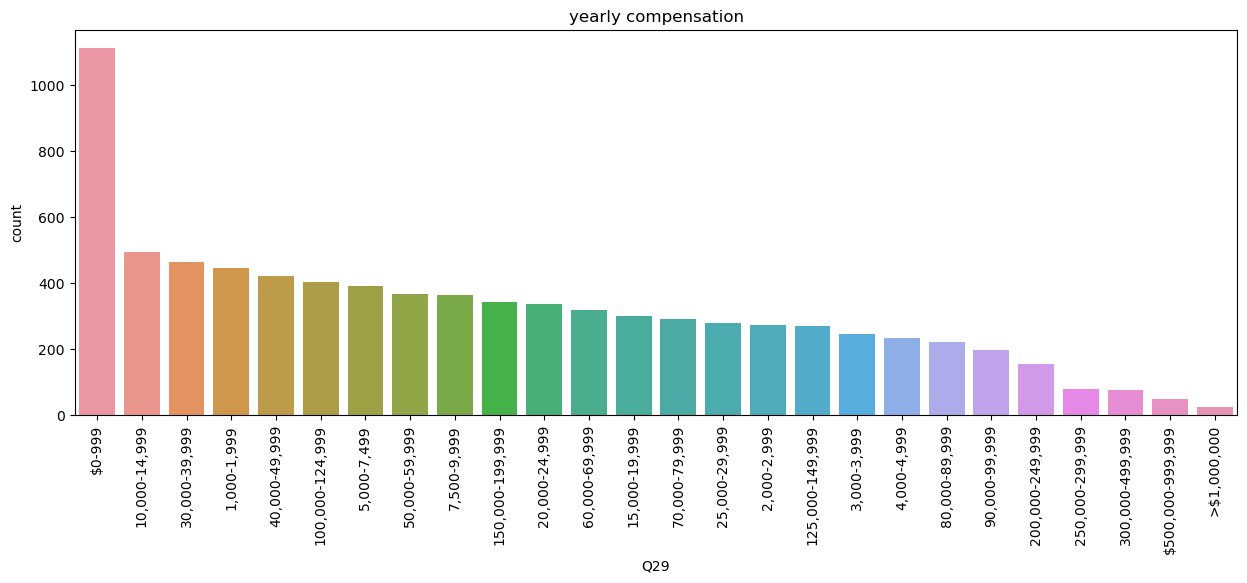

In [29]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x = 'Q29', data = survey, order = survey.Q29.value_counts().index).set_title('yearly compensation')

<div class = "alert alert-block alert-info">
<font color = "red">More Than thousand of people have yearlycompensation between $0-999. all the other year compensation consist of individual below 600.</font>
</div>